Exploratory Data Analysis

1. Analysis
  - univariate analysis
  - multivariate analysis


2. Feature Engineering
  - creating new columns
  - modifying existing ones


3. Handling Outliers
  - Detect Outliers
  - Remove Outliers

EDA process is highly iterative ( 1- 2- 3 again 1- 2- 3- for more refining)

here we have a baeutiful example of EDA on titanic data set

In [187]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [188]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [189]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Categorical columns
   
   - survived   (dead = 0, alive = 1)
   - pclass     (1, 2, 3)
   - sex        (male, female)
   - sibsp      (sibiling or spouse wife)
   - parch      (parent child)
   - embarked   ( which city s,c,q)

Numerical columns
    
   - Age
   - fare
   - passenger_id

Mixed Columns
   - name
   - ticket
   - cabin

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [191]:
# few conclusions

# 1 missing values in age, cabin and embarked colummns
# 2 more than 70% values of cabin is missing, will have to drop
# 3 few columns have inappropiate data type

In [192]:
df.drop(columns=['Cabin'],inplace=True)

In [193]:
# filling thje age value by mean 
df.fillna(df['Age'].mean(),inplace=True)

In [194]:
# finding the major passenger of one city
df['Embarked'].value_counts()

# then replace the missing value by the highest one
df['Embarked'].fillna('S',inplace=True)

now changing the data type for the followwing col

  - Survived(category)
  - Pclass(category)
  - Sex(category)
  - Age(int)
  - Embarked(category)

In [195]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int')
df['Embarked'] = df['Embarked'].astype('category')


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [197]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Analysis
1. univariate

0    61.616162
1    38.383838
Name: Survived, dtype: float64


c:\Users\HARSHIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


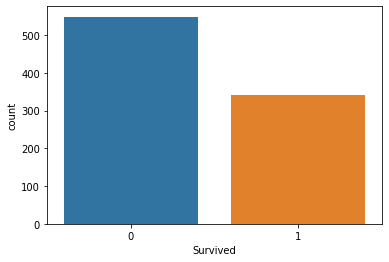

In [198]:
sns.countplot(df['Survived'])
print((df['Survived'].value_counts()/891)*100)
# 500 + people are dead out of 891 around 61%

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


c:\Users\HARSHIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


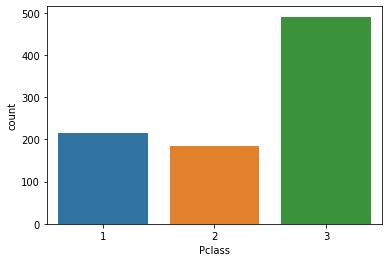

In [199]:
sns.countplot(df['Pclass'])
print((df['Pclass'].value_counts()/891)*100)

male      64.758698
female    35.241302
Name: Sex, dtype: float64


c:\Users\HARSHIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


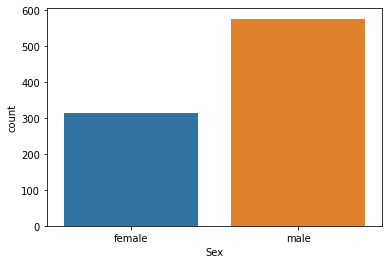

In [200]:
sns.countplot(df['Sex'])
print((df['Sex'].value_counts()/891)*100)

c:\Users\HARSHIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


S                    72.278339
C                    18.855219
Q                     8.641975
29.69911764705882     0.224467
Name: Embarked, dtype: float64


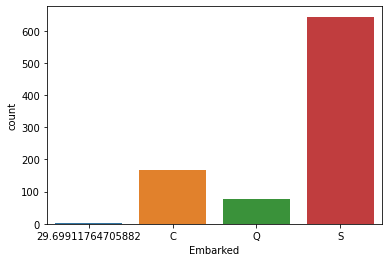

In [201]:
sns.countplot(df['Embarked'])
print((df['Embarked'].value_counts()/891)*100)

c:\Users\HARSHIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

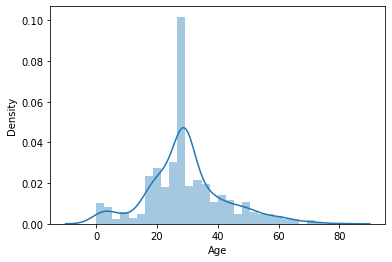

In [202]:
sns.distplot(df['Age'])
# most of the people are young

c:\Users\HARSHIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

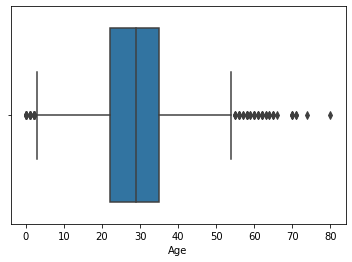

In [203]:
sns.boxplot(df['Age'])

Multivariate analysis

c:\Users\HARSHIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


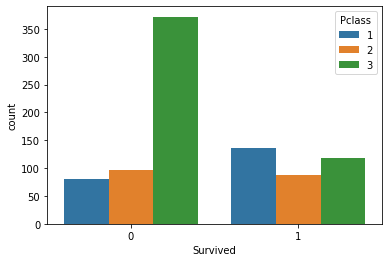

In [204]:
#survival with Pclass
sns.countplot(df['Survived'],hue=df['Pclass'])
pd.crosstab(df['Pclass'],df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)


c:\Users\HARSHIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


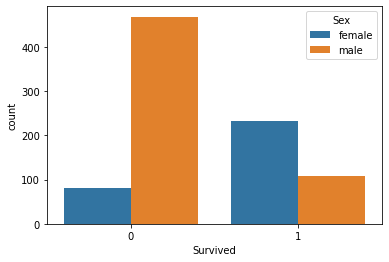

In [205]:
sns.countplot(df['Survived'],hue=df['Sex'])
pd.crosstab(df['Sex'],df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

c:\Users\HARSHIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\HARSHIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

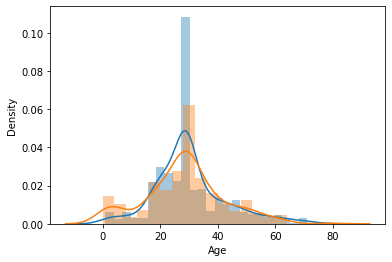

In [206]:
# age comparison with both cases survived and death
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

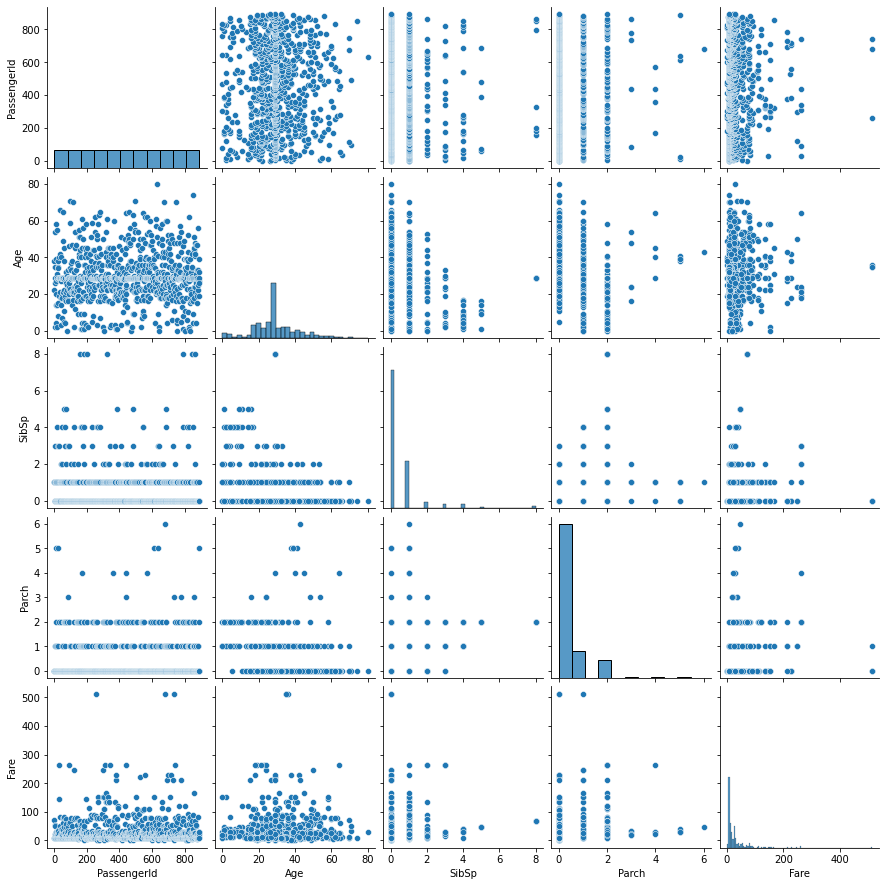

In [207]:
#pair plot is graph between avery thing
sns.pairplot(df)

Featuring Engineering

In [208]:
#featuring :
df['Family_size'] = df['Parch'] + df['SibSp']

In [209]:
def family(number):
    if (number >= 4):
        return  'large'
    elif (number <= 3) & (number != 0):
        return 'medium'
    else:
        return 'alone'

In [210]:
df['Family_size']=  df['Family_size'].apply(family)

In [211]:
df.drop(columns=['Parch','SibSp'],inplace= True)

In [212]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,S,medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C,medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,S,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,S,medium
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,S,alone
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,211536,13.0000,S,alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,112053,30.0000,S,alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,W./C. 6607,23.4500,S,medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26,111369,30.0000,C,alone


In [213]:
pd.crosstab(df['Family_size'],df['Survived']).apply(lambda x: round((x/x.sum())*100,1),axis =1)

Survived,0,1
Family_size,,
alone,69.6,30.4
large,83.9,16.1
medium,42.1,57.9


One hot encoding
it is a important and crutial part of the EDA

In [214]:
# so in this we have to change every categorical data into the 0 and 1

# sex, Pclass, Sex, Embarked, Family_type, and we have limitted cities so we can also do that
df =pd.get_dummies(data= df,columns=['Pclass','Sex','Family_size','Embarked'],drop_first=True)
df

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Family_size_large,Family_size_medium,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,0,1,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,PC 17599,71.2833,0,0,0,0,1,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,0,0,0,0,1,0,0,1
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,1,0,1,0,0,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,0,0,0,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,0,1,0,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,0,0,1,0,0,1,0,0


<AxesSubplot:>

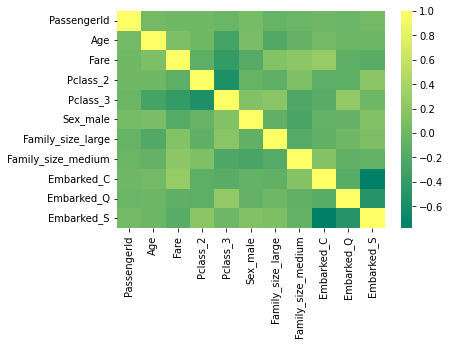

In [215]:
sns.heatmap(df.corr(),cmap='summer')